This code implements the nn with tensorflow

In [18]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dim_fe = 784 # dim of feature 
n_class = 10 # number of classes

# run session
sess = tf.InteractiveSession()

# get dataset 

In [19]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Variable definition

In [20]:
x = tf.placeholder(dtype=tf.float32, shape=[None,dim_fe])
y_ = tf.placeholder(dtype=tf.float32, shape=[None,n_class])
W = tf.Variable(initial_value=tf.zeros([dim_fe, n_class]))
b = tf.Variable(initial_value=tf.zeros([n_class]))
print 'x\'s shape:', x.get_shape()
print 'y_\'s shape:', y_.get_shape()
print 'W\'s shape:', W.get_shape()
print 'b\'s shape:', b.get_shape()

y = tf.matmul(x, W) + b
y = tf.nn.softmax(y)
print 'y\'s shape:', y.get_shape()

# initialize
sess.run(tf.initialize_all_variables())

x's shape: (?, 784)
y_'s shape: (?, 10)
W's shape: (784, 10)
b's shape: (10,)
y's shape: (?, 10)


# Define loss

In [21]:
cross_entropy = tf.reduce_mean(input_tensor=-tf.reduce_sum(input_tensor=y_*tf.log(y), reduction_indices=1))


# Define eval model

In [22]:
correct_prediction = tf.equal(tf.argmax(y,dimension=1), tf.argmax(y_,dimension=1))
accuracy = tf.reduce_mean(input_tensor=tf.cast(correct_prediction, dtype=tf.float32))

# Train model

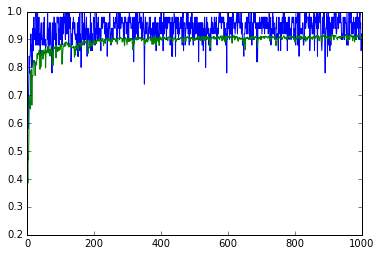

In [23]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_step = train_step.minimize(loss=cross_entropy)

x_axis = []
err_train = []
err_test = []
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
    # draw error line
    x_axis.append(i)
    err_train.append(accuracy.eval(feed_dict={x: batch[0], y_: batch[1]}))
    err_test.append(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    
plt.plot(x_axis, err_train)
plt.plot(x_axis, err_test)
    


# eval

In [24]:
print accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})


0.9092
